# project Data Mining

# Réalisé par : Nidhal Hazbri 3DNI2

## Objectifs :
    • Maitriser l’API de twitter pour l’extraction des tweets
    • Maitriser la partie NLP (natural language processing) avec NLTK en Python
    • Appliquer les principes de nettoyage des données
    • Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peutêtre considérée comme une étape 

## Specifications
lmaginons que vous avez un compte Twitter, et que vous lez suivre les tweets sur ce reseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n'avez pas la possibilite de les lire tous. Pour cela, vous avez besoin d'une application qui va jouer le role d'assistantet qui va
vous effectuer un resume de toutes ces informations. Une des approches qu'on peut utiliser estde le classer sous former de groupes de sorte a ce qu'on presente a l'utilisateur un seul Tweet de
chaque groupe. Pour cela, on doit proceder en trois grandes etapes :


## Travail faire
On a Telecharger les tweets a partir de Twitter en utilisant l'API de twitter. Pour cela, vous devriez un compte « Twitter Developper ». Pour cela, vous devriez telecharger au moins 10 mille twwets. Pour la documentation de l'API de twitter, vous pouvez consulter les liens suivants :


In [31]:
import pandas as pd
import tweepy
consumer_key="LHZVzcEN30hfmN2cPBqkoB3wq"
consumer_secret="DGZ7gQFDlqXoPfmAUWHOsY2eMTA0qhgKVb3rbExcx8Vhav3x3a"
access_token="1325046107437752325-a2zNm36NnzJqTFBFkIagjzpkdCadjs"
access_token_secret="7ohQJ7WTf2DuHsr9NNwPkOPXq5zUkaycrzo2nPhPUoGLL"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [32]:
twitter_data_analysis = pd.DataFrame(columns = ['text'])
i=0

In [33]:
tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)
# Iterate and print tweets
for tweet in tweets:
    twitter_data_analysis.loc[i,"text"] = tweet.text
    i+=1

In [34]:
print(twitter_data_analysis.shape)

(3225, 1)


In [35]:
#tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)
# Iterate and print tweets
#for tweet in tweets:
 #   twitter_data_analysis.loc[i,"text"] = tweet.text
  #  i+=1

In [36]:
#print(twitter_data_analysis.shape)

(6450, 1)


In [37]:
#tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)
# Iterate and print tweets
#for tweet in tweets:
 #   twitter_data_analysis.loc[i,"text"] = tweet.text
  #  i+=1

In [38]:
#print(twitter_data_analysis.shape)

(9675, 1)


In [39]:
import csv
twitter_data_analysis.to_csv('twitter_data_analysis.csv',index = False)
twitter_data_analysis.head(10)

,text
0,There’s more! We’ll also be testing sharing Tw...
1,Oh snap! 👻\n\nSharing Tweets directly to your ...
2,@levantinepali a stamp of approval https://t.c...
3,2020 in one word
4,@Astro_AJC this is what cuffing season means t...
5,@un3asyy 2 is also cute
6,@DeePeeArts you're all amazing
7,RT @shesooosaddity: if you had a twitter befor...
8,@CloudNaii 40404
9,@issahairplug drink water replaced good morning


In [41]:
twitter_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9675 entries, 0 to 9674
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9675 non-null   object
dtypes: object(1)
memory usage: 471.2+ KB


## Pretraitement des tweets
Dans cette etape, l'objectif est d'eliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url,emoji ...


In [42]:
import re
for index, row in twitter_data_analysis.iterrows():
    err = row['text']
    new0 = re.sub(r"http\S+", "", err)
    new1 = re.sub(r"#\S+", "", new0)
    new2 = re.sub(r"@\S+", "", new1)
    new3 = re.sub(r"\n+", "", new2)
    new4 = re.sub(r"RT+", "", new3)
    new5 = re.sub("hhh+", '', new4)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    new6 = re.sub(emoji_pattern, "", new5)
    twitter_data_analysis.loc[index,'text'] =new6
    
    

In [43]:
twitter_data_analysis.head(40)

,text
0,There’s more! We’ll also be testing sharing Tw...
1,Oh snap! Sharing Tweets directly to your Snapc...
2,a stamp of approval
3,2020 in one word
4,this is what cuffing season means to us
5,2 is also cute
6,you're all amazing
7,if you had a twitter before 2020 rt this
8,40404
9,drink water replaced good morning


In [44]:
twitter_data_analysis.to_csv('cleaning_twitter_data_analysis.csv',index = False)


In [45]:
import nltk 
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Traitement des tweets: NLP (Natural LanguageProcessing)
On doit proceder a !'analyse du tweet en respectant les differentes etapes du NLP (Natural LanguageProcessing). La bibliotheque a utiliser est NLTK en Python.


In [46]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,twitter_data_analysis.shape[0]):
    stemmed_array=twitter_data_analysis['text'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:10])

['there’ more! we’ll also test share tweet IG stori small % keep eye', 'Oh snap! share tweet directli snapchat stori easier ever. roll today ios!', 'stamp approv', '2020 one word', 'cuf season mean us', '2 also cute', 'amaz', 'twitter 2020 rt', '40404', 'drink water replac good morn']


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(stemed_dataset)
print(X)

  (0, 2430)	1
  (0, 1581)	1
  (0, 2688)	1
  (0, 1426)	1
  (0, 130)	1
  (0, 2412)	1
  (0, 2134)	1
  (0, 2560)	1
  (0, 1233)	1
  (0, 2307)	1
  (0, 2196)	1
  (0, 1327)	1
  (0, 864)	1
  (1, 2134)	1
  (1, 2560)	1
  (1, 2307)	1
  (1, 1690)	1
  (1, 2206)	1
  (1, 700)	1
  (1, 2207)	1
  (1, 763)	1
  (1, 828)	1
  (1, 2022)	1
  (1, 2480)	1
  (1, 1278)	1
  :	:
  (9669, 1426)	1
  (9669, 222)	1
  (9669, 1691)	1
  (9669, 516)	1
  (9670, 1327)	1
  (9670, 349)	1
  (9670, 2440)	1
  (9670, 181)	1
  (9671, 2688)	1
  (9671, 1426)	1
  (9671, 959)	1
  (9671, 2575)	1
  (9671, 121)	1
  (9671, 2726)	1
  (9671, 515)	1
  (9672, 1055)	1
  (9672, 1162)	1
  (9672, 884)	1
  (9673, 429)	1
  (9674, 2560)	1
  (9674, 1048)	2
  (9674, 1582)	1
  (9674, 1642)	1
  (9674, 142)	1
  (9674, 1089)	1


## Classification des tweets
Etant donne un ensemble de tweets, l'objectif est de les resumer sous formes de groupes de sorte
a ce que les Tweets qui sont dans le meme groupe soient similaires. Ainsi, l'utilisateur pourra par la suite lire juste un Tweet de chaque groupe (le Tweet qui est le centro"ide de groupes).
on a Utiliser l'algorithme K-Means pour classer les Tweets en k classes ,valeurs de k allant de 1 a30 par exemple).


In [48]:
from sklearn.cluster import KMeans
wcss=[]

In [49]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 62652.000
Iteration  1, inertia 33855.196
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.242630e-07
Initialization complete
Iteration  0, inertia 81948.000
Iteration  1, inertia 33855.196
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.242630e-07
Initialization complete
Iteration  0, inertia 34221.000
Iteration  1, inertia 33855.196
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.242630e-07
Initialization complete
Iteration  0, inertia 63084.000
Iteration  1, inertia 33855.196
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.242630e-07
Initialization complete
Iteration  0, inertia 62712.000
Iteration  1, inertia 33855.196
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.242630e-07
Initialization complete
Iteration  0, inertia 99864.000
Iteration  1, inertia 33855.196
Converged at iteration 1: center shift 0.000000e+00 within tol

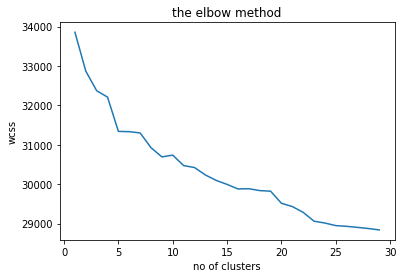

In [50]:

import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [51]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### La cellule suivante contient les mots cles de chaque cluster

In [52]:

print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
 thu
 far
 person
 best
 some
 tweet
 news
 thi
 fix
 flex

Cluster 1:
 twitter
 get
 friend
 follow
 know
 want
 you
 first
 tweet
 stan

Cluster 2:
 tweet
 we
 like
 you
 us
 one
 that
 time
 get
 know

Cluster 3:
 sourc
 say
 our
 no
 forev
 flight
 flex
 fleet
 flaw
 flavor

Cluster 4:
 hot
 brand
 about
 specif
 follow
 takes
 care
 topic
 topics
 now

Cluster 5:
 love
 we
 tweet
 twitter
 see
 true
 make
 share
 timelin
 for

Cluster 6:
 love
 dm
 gratitude
 us
 follow
 you
 we
 share
 do
 much

Cluster 7:
 read
 it
 retweet
 that
 remind
 articl
 article
 befor
 ll
 we

Cluster 8:
 good
 tweet
 outlook
 what
 look
 morn
 twitter
 news
 know
 we

Cluster 9:
 teach
 teacher
 you
 someth
 ᵗᶦⁿʸ
 flatter
 fli
 flex
 fleet
 flaw

Cluster 10:
 around
 cities
 days
 convo
 happen
 us
 virtual
 follow
 40
 10

Cluster 11:
 tweet
 twitter
 there
 octob
 peopl
 best
 retweet
 3rd
 see
 ios

Cluster 12:
 dm
 us
 follow
 searching
 test
 easy
 plan
 we
 ahea

On a choisir un Tweet par classe comme representant. Les tweets choisis seront les resumes de toutes les informations contenues dans les tweets.

In [53]:
result_final_twitter_data_analysis = pd.DataFrame(columns = [ 'text'])
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([stemed_dataset[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster "+str(prediction)+twitter_data_analysis.loc[j,"text"])
            result_final_twitter_data_analysis.loc[i,"text"] =twitter_data_analysis.loc[j,"text"]
            j=0
            break
        j+=1
    i+=1
result_final_twitter_data_analysis.to_csv('result_final_twitter_data_analysis.csv',index = False )

tweet of cluster [0] This is the best "some personal news" Tweet thus far
tweet of cluster [1]  if you had a twitter before 2020 rt this
tweet of cluster [2]There’s more! We’ll also be testing sharing Tweets to IG Stories to a small % so keep an eye out
tweet of cluster [3] Our sources say no.
tweet of cluster [4]Hot takes? Always. Hot topics? Brand new.Now you can follow specific topics to discover the Tweets you care about. 
tweet of cluster [5] love the hustle
tweet of cluster [6] Thank you so much for all that you do, we’d love to share our gratitude. Follow us so we can DM you.
tweet of cluster [7]Reading an article before Retweeting it? That’s growth.Before you Retweet an article, we’ll remind you to read it… 
tweet of cluster [8] drink water replaced good morning
tweet of cluster [9] You're about to teach your teachers something
tweet of cluster [10]10 days. 40 cities. Virtual  are happening around the world. Join us and follow the convo!… 
tweet of cluster [11]You can Tweet a T

## conclusion :
#### on a charge les tweets d'apres l'api de twitter, on les a mis dans le fichier csv twitter_data_analysis. puis on a fait le data cleaning et on a mis le resultat dans le fichier cleaning_twitter_data_analysis.csv.Et enfin on a mis un tweet de chaque cluster dans le fichier result_final_twitter_data_analysis.



# [lien github](https://github.com/hazbri/projectDataMining/)